In [1]:
import pandas as pd 
data_17_18 = pd.read_csv("DatasetsOriginais/transfermarkt/transfermarkt_fbref_201718.csv", delimiter = ';',  index_col=0)
data_18_19 = pd.read_csv("DatasetsOriginais/transfermarkt/transfermarkt_fbref_201819.csv", delimiter = ';',  index_col=0,  low_memory=False)
data_19_20 = pd.read_csv("DatasetsOriginais/transfermarkt/transfermarkt_fbref_201920.csv", delimiter = ';',  index_col=0)

In [2]:
data_17_18.head()

,player,nationality,position,squad,age,birth_year,value,height,position2,foot,...,Pts/G,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season
379,Burgui,es ESP,"FW,MF",Alavés,23,1993,1800000,186,attack - Left Winger,right,...,1.24,39.0,53.2,-14.2,-0.37,"16,819",0,0,0,201718#
2530,Raphaël Varane,fr FRA,DF,Real Madrid,24,1993,70000000,191,Defender - Centre-Back,right,...,2.00,83.3,45.4,37.9,1.00,66161,1,1,0,201718#
721,Rubén Duarte,es ESP,DF,Alavés,21,1995,2000000,179,Defender - Left-Back,left,...,1.24,39.0,53.2,-14.2,-0.37,"16,819",0,0,0,201718#
2512,Samuel Umtiti,fr FRA,DF,Barcelona,23,1993,60000000,182,Defender - Centre-Back,left,...,2.45,78.3,41.1,37.2,0.98,66603,1,0,0,201718#
882,Manu García,es ESP,MF,Alavés,31,1986,1800000,183,midfield - Defensive Midfield,left,...,1.24,39.0,53.2,-14.2,-0.37,"16,819",0,0,0,201718#


In [3]:
data_17_18['season_year'] = 2018
data_18_19['season_year'] = 2019
data_19_20['season_year'] = 2020

In [4]:
# Concatenate the DataFrames vertically
data = pd.concat([data_17_18, data_18_19, data_19_20], ignore_index=True)

In [5]:
data.head()

,player,nationality,position,squad,age,birth_year,value,height,position2,foot,...,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season,season_year
0,Burgui,es ESP,"FW,MF",Alavés,23.0,1993.0,1800000.0,186.0,attack - Left Winger,right,...,39.0,53.2,-14.2,-0.37,"16,819",0.0,0.0,0.0,201718#,2018
1,Raphaël Varane,fr FRA,DF,Real Madrid,24.0,1993.0,70000000.0,191.0,Defender - Centre-Back,right,...,83.3,45.4,37.9,1.00,66161,1.0,1.0,0.0,201718#,2018
2,Rubén Duarte,es ESP,DF,Alavés,21.0,1995.0,2000000.0,179.0,Defender - Left-Back,left,...,39.0,53.2,-14.2,-0.37,"16,819",0.0,0.0,0.0,201718#,2018
3,Samuel Umtiti,fr FRA,DF,Barcelona,23.0,1993.0,60000000.0,182.0,Defender - Centre-Back,left,...,78.3,41.1,37.2,0.98,66603,1.0,0.0,0.0,201718#,2018
4,Manu García,es ESP,MF,Alavés,31.0,1986.0,1800000.0,183.0,midfield - Defensive Midfield,left,...,39.0,53.2,-14.2,-0.37,"16,819",0.0,0.0,0.0,201718#,2018


In [6]:
data = data.drop('Season', axis=1)

In [7]:
data = data.drop('Attendance', axis=1)

In [8]:
# Extract country code from the nationality column
data['nationality'] = data['nationality'].str[-3:]

In [9]:
data = data.dropna()

In [10]:
null_counts = data.isnull().sum()
print(null_counts)

player          0
nationality     0
position        0
squad           0
age             0
               ..
xGDiff/90       0
CL              0
WinCL           0
CLBestScorer    0
season_year     0
Length: 398, dtype: int64


In [11]:
data.shape[0]

6409

In [12]:
data.position.unique()

array(['FW,MF', 'DF', 'MF', 'MF,FW', 'FW', 'GK', 'MF,DF', 'DF,MF',
       'DF,FW', 'FW,DF', 'GK,MF'], dtype=object)

In [13]:
data.position2.unique()

array(['attack - Left Winger', 'Defender - Centre-Back',
       'Defender - Left-Back', 'midfield - Defensive Midfield',
       'attack - Right Winger', 'attack - Centre-Forward',
       'midfield - Central Midfield', 'Goalkeeper',
       'midfield - Attacking Midfield', 'midfield - Right Midfield',
       'Defender - Right-Back', 'midfield - Left Midfield',
       'attack - Second Striker', 'Forward - Centre-Forward',
       'Forward - Left Winger', 'Midfielder - Defensive Midfield',
       'Forward - Right Winger', 'Midfielder - Central Midfield',
       'Midfielder - Attacking Midfield', 'Midfielder - Left Midfield',
       'Midfielder - Right Midfield', 'Forward - Second Striker',
       'Central Midfield'], dtype=object)

In [14]:
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()

print("Categorical columns:", categorical_columns)

Categorical columns: ['player', 'nationality', 'position', 'squad', 'position2', 'foot', 'league']


In [15]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

In [16]:
dropped = data.drop(['value'], axis=1)

# Select the relevant features and target variable
features_scale = dropped.drop(['player', 'nationality', 'position', 'squad', 'position2', 'foot', 'league'], axis=1)
features_encode = dropped[[ 'player', 'nationality', 'position', 'squad', 'position2', 'foot', 'league']]
target = data['value']

# Preprocess the scaled features
scaled_features = features_scale.apply(pd.to_numeric, errors='coerce').values
scaled_features = np.nan_to_num(scaled_features)

# One-hot encode the categorical features
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(features_encode).toarray()

# Concatenate the scaled features and encoded features
features = np.concatenate((scaled_features, encoded_features), axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

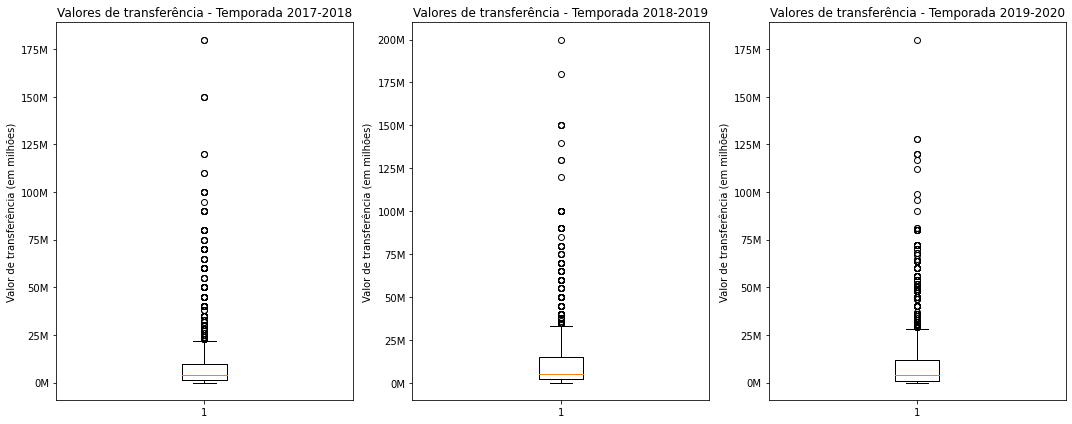

In [17]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Filtrar os dados para cada temporada
data_2017_2018 = data[data['season_year'] == 2018]
data_2018_2019 = data[data['season_year'] == 2019]
data_2019_2020 = data[data['season_year'] == 2020]

# Configurar a figura e os eixos
fig, ax = plt.subplots(1, 3, figsize=(15, 6))

# Definir o formatador de rótulo personalizado
def millions_formatter(x, pos):
    return f'{int(x/1e6)}M'

# Configurar o formatador para os eixos y
y_formatter = ticker.FuncFormatter(millions_formatter)

# Boxplot para a temporada 2017-2018
ax[0].boxplot(data_2017_2018['value'])
ax[0].set_title('Valores de transferência - Temporada 2017-2018')
ax[0].set_ylabel('Valor de transferência (em milhões)')
ax[0].yaxis.set_major_formatter(y_formatter)

# Boxplot para a temporada 2018-2019
ax[1].boxplot(data_2018_2019['value'])
ax[1].set_title('Valores de transferência - Temporada 2018-2019')
ax[1].set_ylabel('Valor de transferência (em milhões)')
ax[1].yaxis.set_major_formatter(y_formatter)

# Boxplot para a temporada 2019-2020
ax[2].boxplot(data_2019_2020['value'])
ax[2].set_title('Valores de transferência - Temporada 2019-2020')
ax[2].set_ylabel('Valor de transferência (em milhões)')
ax[2].yaxis.set_major_formatter(y_formatter)

# Ajustar o espaçamento entre os subplots
plt.tight_layout()

# Exibir o gráfico
plt.show()


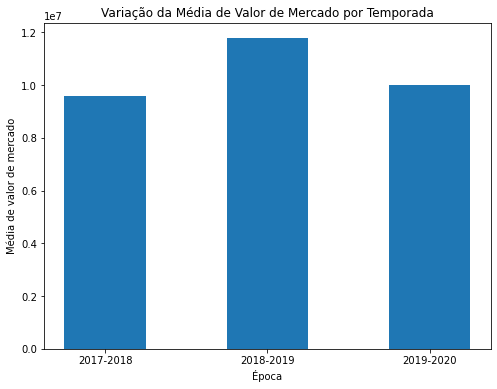

In [18]:
# Calcular a média do valor de mercado para cada temporada
media_2017_2018 = data_2017_2018['value'].mean()
media_2018_2019 = data_2018_2019['value'].mean() 
media_2019_2020 = data_2019_2020['value'].mean() 

# Configurar a figura e os eixos
fig, ax = plt.subplots(figsize=(8, 6))

# Criar as barras
bar_width = 0.5
bar_positions = [0, 1, 2]
bar_values = [media_2017_2018, media_2018_2019, media_2019_2020]
bar_labels = ['2017-2018', '2018-2019', '2019-2020']
ax.bar(bar_positions, bar_values, width=bar_width)

# Configurar os rótulos dos eixos
ax.set_xlabel('Época')
ax.set_ylabel('Média de valor de mercado')
ax.set_xticks(bar_positions)
ax.set_xticklabels(bar_labels)

# Configurar o título do gráfico
ax.set_title('Variação da Média de Valor de Mercado por Temporada')

# Exibir o gráfico
plt.show()


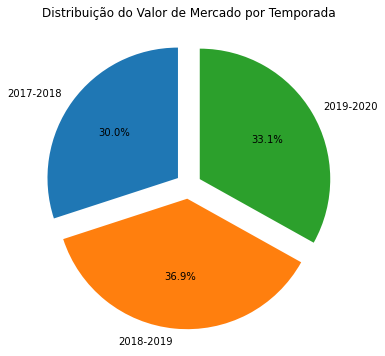

In [19]:
# Calcular a soma do valor de mercado para cada temporada
soma_2017_2018 = data_2017_2018['value'].sum()
soma_2018_2019 = data_2018_2019['value'].sum()
soma_2019_2020 = data_2019_2020['value'].sum()

# Configurar as informações do gráfico
labels = ['2017-2018', '2018-2019', '2019-2020']
sizes = [soma_2017_2018, soma_2018_2019, soma_2019_2020]
explode = (0.1, 0.1, 0.1)  # Define a fatia destacada

# Configurar a figura e os eixos
fig, ax = plt.subplots(figsize=(8, 6))

# Criar o gráfico de pizza
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)

# Configurar o título do gráfico
ax.set_title('Distribuição do Valor de Mercado por Temporada')

# Exibir o gráfico
plt.show()


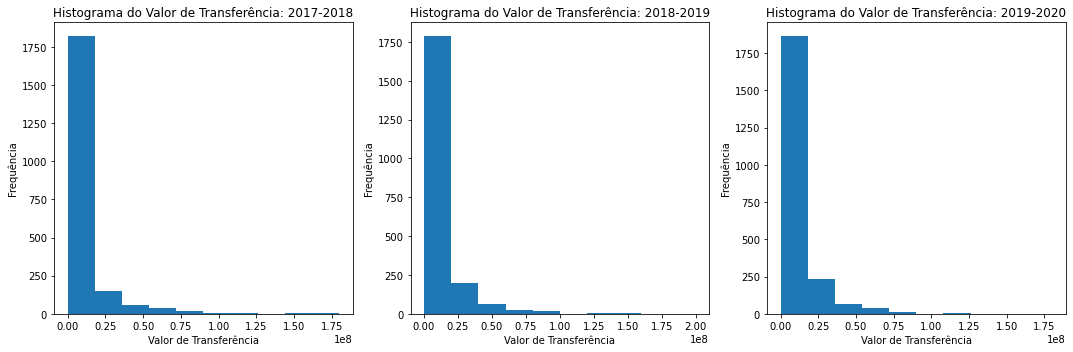

In [20]:
# Configurar a figura e os eixos
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Histograma para a temporada 2017-2018
ax[0].hist(data_2017_2018['value'], bins=10)
ax[0].set_xlabel('Valor de Transferência')
ax[0].set_ylabel('Frequência')
ax[0].set_title('Histograma do Valor de Transferência: 2017-2018')

# Histograma para a temporada 2018-2019
ax[1].hist(data_2018_2019['value'], bins=10)
ax[1].set_xlabel('Valor de Transferência')
ax[1].set_ylabel('Frequência')
ax[1].set_title('Histograma do Valor de Transferência: 2018-2019')

# Histograma para a temporada 2019-2020
ax[2].hist(data_2019_2020['value'], bins=10)
ax[2].set_xlabel('Valor de Transferência')
ax[2].set_ylabel('Frequência')
ax[2].set_title('Histograma do Valor de Transferência: 2019-2020')

# Ajustar o espaçamento entre os subplots
plt.tight_layout()

# Exibir o gráfico
plt.show()



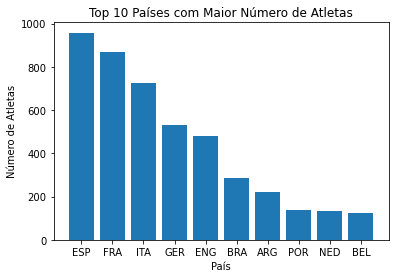

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular o número de atletas por país
nation_count = data['nationality'].value_counts().reset_index()
nation_count.columns = ['country', 'count']

# Filtrar os 10 países com o maior número de atletas
top_10_nations = nation_count.nlargest(10, 'count')

# Ordenar os países em ordem decrescente
top_10_nations = top_10_nations.sort_values('count', ascending=False)

# Criar o gráfico de barras
plt.bar(top_10_nations['country'], top_10_nations['count'])
plt.xlabel('País')
plt.ylabel('Número de Atletas')
plt.title('Top 10 Países com Maior Número de Atletas')

# Exibir o gráfico
plt.show()


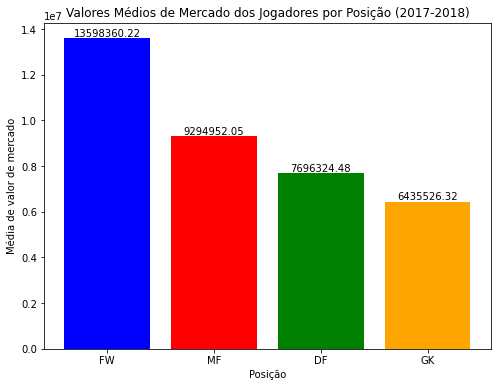

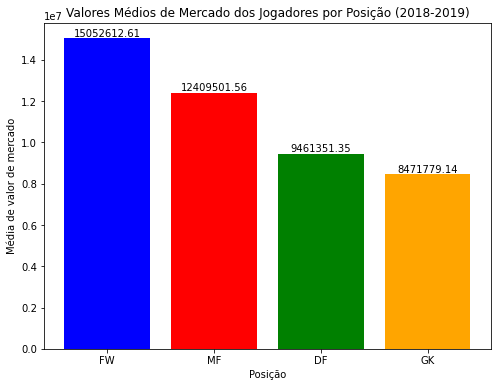

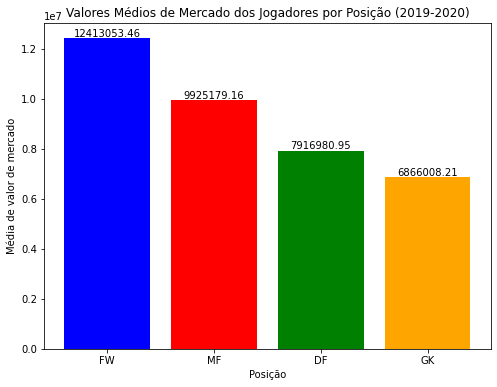

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Datasets para cada temporada
datasets = [data_17_18, data_18_19, data_19_20]

# Configurar as épocas
epocas = ['2017-2018', '2018-2019', '2019-2020']

# Posições e cores para cada posição
#posicoes = ['GK', 'DF', 'MF', 'FW']
posicoes = ['FW', 'MF', 'DF', 'GK']
cores = ['blue', 'red', 'green', 'orange']

# Criar os gráficos
for i in range(len(epocas)):
    valores_medios = [0] * len(posicoes)
    contagens = [0] * len(posicoes)
    
    for dataset in datasets[i:i+1]:
        for index, row in dataset.iterrows():
            posicao = row['position']
            valor = row['value']
            
            if isinstance(posicao, str) and ',' in posicao:
                posicao = posicao.split(',')[0]
            
            if posicao in posicoes:
                idx = posicoes.index(posicao)
                valores_medios[idx] += valor
                contagens[idx] += 1
    
    for j in range(len(valores_medios)):
        if contagens[j] > 0:
            valores_medios[j] /= contagens[j]
    
    # Configurar a figura e os eixos
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Criar as barras
    bar_positions = np.arange(len(posicoes))
    ax.bar(bar_positions, valores_medios, color=cores)
    
    # Configurar os rótulos dos eixos
    ax.set_xlabel('Posição')
    ax.set_ylabel('Média de valor de mercado')
    ax.set_xticks(bar_positions)
    ax.set_xticklabels(posicoes)
    
    # Configurar o título do gráfico
    ax.set_title(f'Valores Médios de Mercado dos Jogadores por Posição ({epocas[i]})')
    
    # Adicionar rótulos de texto nas barras
    for j, v in enumerate(valores_medios):
        ax.text(j, v, str(round(v, 2)), ha='center', va='bottom')
    
    # Exibir o gráfico
    plt.show()


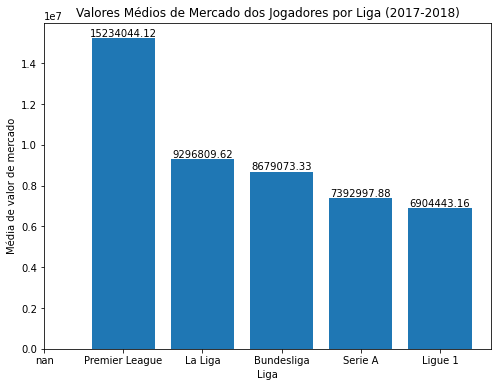

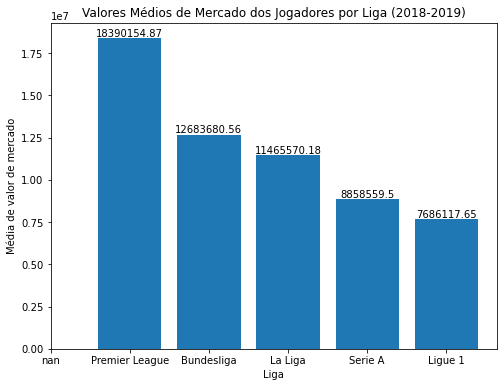

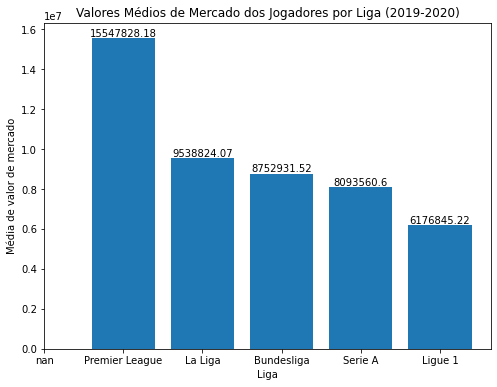

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Datasets para cada temporada
datasets = [data_17_18, data_18_19, data_19_20]

# Configurar as épocas
epocas = ['2017-2018', '2018-2019', '2019-2020']

# Obter a lista de todas as ligas
ligas = set()

for dataset in datasets:
    ligas.update(dataset['league'])

# Criar os gráficos
for i in range(len(epocas)):
    valores_medios = []
    
    for liga in ligas:
        # Filtrar os dados da liga e época atual
        filtro = (datasets[i]['league'] == liga)
        valores = datasets[i].loc[filtro, 'value']
        
        # Calcular o valor médio de mercado para a liga e época atual
        valor_medio = np.mean(valores)
        
        # Adicionar o valor médio à lista
        valores_medios.append(valor_medio)

    # Ordenar as ligas e os valores médios em ordem decrescente
    ligas_sorted, valores_sorted = zip(*sorted(zip(ligas, valores_medios), key=lambda x: x[1], reverse=True))

    # Configurar a figura e os eixos
    fig, ax = plt.subplots(figsize=(8, 6))

    # Criar as barras
    bar_positions = np.arange(len(ligas))
    ax.bar(bar_positions, valores_sorted)

    # Configurar os rótulos dos eixos
    ax.set_xlabel('Liga')
    ax.set_ylabel('Média de valor de mercado')
    ax.set_xticks(bar_positions)
    ax.set_xticklabels(ligas_sorted)

    # Configurar o título do gráfico
    ax.set_title(f'Valores Médios de Mercado dos Jogadores por Liga ({epocas[i]})')

    # Adicionar rótulos de texto nas barras
    for j, v in enumerate(valores_sorted):
    	if np.isfinite(v):
        	ax.text(j, v, str(round(v, 2)), ha='center', va='bottom')

    # Exibir o gráfico
    plt.show()


In [24]:
# Build the neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

learning_rate = 0.1
optimizer = Adam(learning_rate=learning_rate)

# Compile the model
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1)

# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=0)
print('Mean Squared Error:', loss)

# Make predictions
predictions = model.predict(X_test)

# Print the predicted market values
for i in range(len(predictions)):
    print('Predicted:', predictions[i][0], 'Actual:', y_test.iloc[i])

from sklearn.metrics import r2_score
# Compute R-squared score
r2_score = r2_score(y_test, predictions)
print('R-squared:', r2_score)

Epoch 1/100
81/81 [==============================] - 1s 3ms/step - loss: 239447614423040.0000
Epoch 2/100
81/81 [==============================] - 0s 3ms/step - loss: 182601792880640.0000
Epoch 3/100
81/81 [==============================] - 0s 3ms/step - loss: 155279391981568.0000
Epoch 4/100
81/81 [==============================] - 0s 3ms/step - loss: 144742377586688.0000
Epoch 5/100
81/81 [==============================] - 0s 3ms/step - loss: 132335576023040.0000
Epoch 6/100
81/81 [==============================] - 0s 3ms/step - loss: 126603405295616.0000
Epoch 7/100
81/81 [==============================] - 0s 3ms/step - loss: 125516073926656.0000
Epoch 8/100
81/81 [==============================] - 0s 3ms/step - loss: 124454218760192.0000
Epoch 9/100
81/81 [==============================] - 0s 3ms/step - loss: 123357894803456.0000
Epoch 10/100
81/81 [==============================] - 0s 3ms/step - loss: 119330289221632.0000
Epoch 11/100
81/81 [==============================] - 0s 3m

In [25]:
from sklearn.ensemble import RandomForestRegressor

# Create the RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=200, min_samples_split= 2, min_samples_leaf=2, max_features='sqrt', max_depth=10)

rf_model.fit(X_train, y_train)

# Evaluate the models
rf_predictions = rf_model.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_predictions)

print('Random Forest Mean Squared Error:', rf_mse)

# Print the predicted market values using Random Forest
for i in range(len(rf_predictions)):
    print('Random Forest - Predicted:', rf_predictions[i], 'Actual:', y_test.iloc[i])

from sklearn.metrics import r2_score
# Compute R-squared score
r2_score = r2_score(y_test, rf_predictions)
print('R-squared:', r2_score)


Random Forest Mean Squared Error: 113070164826872.78
Random Forest - Predicted: 15284342.557391286 Actual: 12000000.0
Random Forest - Predicted: 1792922.7695887205 Actual: 15000.0
Random Forest - Predicted: 13546488.150712403 Actual: 30000000.0
Random Forest - Predicted: 4405044.518839671 Actual: 5000.0
Random Forest - Predicted: 4010309.5145558985 Actual: 12000000.0
Random Forest - Predicted: 12927077.718834065 Actual: 14000000.0
Random Forest - Predicted: 6567050.792277783 Actual: 5000000.0
Random Forest - Predicted: 6767181.306225829 Actual: 7000000.0
Random Forest - Predicted: 10478592.9944226 Actual: 7000000.0
Random Forest - Predicted: 10510305.22160263 Actual: 2000000.0
Random Forest - Predicted: 7997269.895945494 Actual: 3000000.0
Random Forest - Predicted: 23975181.958462764 Actual: 15000000.0
Random Forest - Predicted: 3897365.3418353153 Actual: 1000000.0
Random Forest - Predicted: 8691482.547573792 Actual: 10000000.0
Random Forest - Predicted: 9561167.278834367 Actual: 20000

In [26]:
import xgboost as xgb

# Train the XGBoost model
xgb_model = xgb.XGBRegressor(subsample=1.0, n_estimators=700, max_depth=3, learning_rate=0.1, colsample_bytree=0.5, n_jobs=-1, gamma=1.0)
xgb_model.fit(X_train, y_train)

# Get feature importances
importance_scores = xgb_model.feature_importances_

# Select top-k important features
k = 40
top_k_features_indices = importance_scores.argsort()[-k:][::-1]
top_k_features = X_train[:, top_k_features_indices]

# Train and evaluate the model using the selected features
xgb_model_selected = xgb.XGBRegressor(subsample=1.0, n_estimators=700, max_depth=3, learning_rate=0.1, colsample_bytree=0.5, n_jobs=-1, gamma=1.0)
xgb_model_selected.fit(top_k_features, y_train)
xgb_predictions_selected = xgb_model_selected.predict(X_test[:, top_k_features_indices])

# Evaluate the model with selected features
xgb_mse_selected = mean_squared_error(y_test, xgb_predictions_selected)
print('XGBoost with Feature Selection Mean Squared Error:', xgb_mse_selected)

# Print the predicted market values using XGBoost with selected features
for i in range(len(xgb_predictions_selected)):
    print('XGBoost with Feature Selection - Predicted:', xgb_predictions_selected[i], 'Actual:', y_test.iloc[i])

from sklearn.metrics import r2_score
# Compute R-squared score with selected features
r2_score_selected = r2_score(y_test, xgb_predictions_selected)
print('R-squared with Feature Selection:', r2_score_selected)


XGBoost with Feature Selection Mean Squared Error: 70069382878141.89
XGBoost with Feature Selection - Predicted: 6417107.0 Actual: 12000000.0
XGBoost with Feature Selection - Predicted: 492214.25 Actual: 15000.0
XGBoost with Feature Selection - Predicted: 21084050.0 Actual: 30000000.0
XGBoost with Feature Selection - Predicted: 2625791.0 Actual: 5000.0
XGBoost with Feature Selection - Predicted: 7933201.5 Actual: 12000000.0
XGBoost with Feature Selection - Predicted: 23768104.0 Actual: 14000000.0
XGBoost with Feature Selection - Predicted: 7112856.5 Actual: 5000000.0
XGBoost with Feature Selection - Predicted: 5954905.5 Actual: 7000000.0
XGBoost with Feature Selection - Predicted: 8594184.0 Actual: 7000000.0
XGBoost with Feature Selection - Predicted: 3054782.2 Actual: 2000000.0
XGBoost with Feature Selection - Predicted: 5473230.5 Actual: 3000000.0
XGBoost with Feature Selection - Predicted: 25019474.0 Actual: 15000000.0
XGBoost with Feature Selection - Predicted: 1864630.9 Actual: 10

In [27]:
import lightgbm as lgb

# Train the LightGBM model
lgb_model = lgb.LGBMRegressor(n_estimators=200, learning_rate=0.1, max_depth=5)
lgb_model.fit(X_train, y_train)

# Get feature importances
importance_scores = lgb_model.feature_importances_

# Select top-k important features
k = 40
top_k_features_indices = importance_scores.argsort()[-k:][::-1]
top_k_features = X_train[:, top_k_features_indices]

# Train and evaluate the model using the selected features
lgb_model_selected = lgb.LGBMRegressor(n_estimators=200, learning_rate=0.1, max_depth=5)
lgb_model_selected.fit(top_k_features, y_train)
lgb_predictions_selected = lgb_model_selected.predict(X_test[:, top_k_features_indices])

# Evaluate the model with selected features
lgb_mse_selected = mean_squared_error(y_test, lgb_predictions_selected)
print('LightGBM with Feature Selection Mean Squared Error:', lgb_mse_selected)

# Print the predicted market values using LightGBM with selected features
for i in range(len(lgb_predictions_selected)):
    print('LightGBM with Feature Selection - Predicted:', lgb_predictions_selected[i], 'Actual:', y_test.iloc[i])

from sklearn.metrics import r2_score
# Compute R-squared score with selected features
r2_score_selected = r2_score(y_test, lgb_predictions_selected)
print('R-squared with Feature Selection:', r2_score_selected)


LightGBM with Feature Selection Mean Squared Error: 60081456356668.484
LightGBM with Feature Selection - Predicted: 12416409.66141729 Actual: 12000000.0
LightGBM with Feature Selection - Predicted: 3293566.3661648235 Actual: 15000.0
LightGBM with Feature Selection - Predicted: 18642666.304972924 Actual: 30000000.0
LightGBM with Feature Selection - Predicted: 3433502.0023867944 Actual: 5000.0
LightGBM with Feature Selection - Predicted: 6730975.76584377 Actual: 12000000.0
LightGBM with Feature Selection - Predicted: 12877230.268554296 Actual: 14000000.0
LightGBM with Feature Selection - Predicted: 8174710.745105488 Actual: 5000000.0
LightGBM with Feature Selection - Predicted: 7754446.721363696 Actual: 7000000.0
LightGBM with Feature Selection - Predicted: 7072953.210987217 Actual: 7000000.0
LightGBM with Feature Selection - Predicted: 1697467.0951500053 Actual: 2000000.0
LightGBM with Feature Selection - Predicted: 5283031.6217676755 Actual: 3000000.0
LightGBM with Feature Selection - 